## Trabalho 2 de Calculo Computacional
Aluno: Yhann Matheus de Dio Mirana Mendes.  
Matricula: 202404940019

### Objetivos do Trabalho:  
A : Transformar em codigo o procedimento de Gradiente descedente descrito nos slides 156 à 213.  
B : Transformar em codigo o processo de Regressao Linear escrito descrito nos slides 302 à 335 e Adaptar o codigo para rodar como o Gradiente Descendente Estocastico.  
D : Transformar em codigo a demonstração do gradiente descendente em redes neurais e imprimir as informações Step Size, New e Old b_3.  
E : Transformar em codigo a demonstração do gradiente ddescendente em redes neurais e imprimir as informações Step Size, New e Old. 

### A) Gradiente Descendente

Nessa parte do trabalho, estudo como ajustar uma reta a um conjunto de pontos no plano usando regressão linear e, posteriormente, aplicando gradiente descendente. O modelo escolhido para ajustar os pontos é uma reta dada por:

$$
y' = \theta_0 + \theta_1 \cdot x
$$

**Onde:**
- $\theta_0$ é o intercepto
- $\theta_1$ é o coeficiente angular

O objetivo aqui é encontrar os valores de $\theta_0$ e $\theta_1$ de modo que a reta se ajuste da melhor forma possível aos pontos fornecidos.

---

#### Definição do Erro

Para cada $(x_i, y_i)$, o modelo prevê um valor $y'_i$. A diferença entre o valor previsto $y'_i$ e o valor real $y_i$ é o erro, definido como:

$$
erro = y'_i - y_i
$$

No entanto, ao somar erros de vários pontos, valores positivos e negativos podem se anular, mascarando a qualidade do ajuste. Para evitar isso, utiliza-se o erro ao quadrado.

---

#### Função de Custo

Assim, a função custo ou soma dos erros quadráticos é definida como:

$$
J(\theta_0, \theta_1) = \sum_{i=1}^{n} (erro)^2 = \sum_{i=1}^{n} (y'_i - y_i)^2 = \sum_{i=1}^{n} (\theta_0 + \theta_1 \cdot x_i - y_i)^2
$$

O uso da **Soma dos Erros Quadráticos** aumenta a penalização de erros maiores e garante que todos os resultados sejam positivos. O objetivo do gradiente descendente é encontrar os valores de $\theta_0$ e $\theta_1$ que minimizam essa função de custo $J$.

### Aplicação
Com a teoria apresentada, vou à apresentação do meu código implementando o gradiente descendente para ajustar a reta aos pontos fornecidos e, juntamente a isso, vou iniciar as variáveis necessárias para o processo $\theta_0$ e $\theta_1$.

| x    | y    |
|------|------|
| -5.0 | -1.2 |
| -4.0 |  0.8 |
| -3.0 |  0.6 |
| -2.0 |  1.3 |
| -1.0 |  1.9 |
|  0.0 |  2.0 |
|  1.0 |  2.5 |
|  2.0 |  2.9 |
|  3.0 |  4.3 |
|  4.0 |  5.1 |

Esse conjunto de pontos servirá para "treinar" a reta, usado como entrada de dados para o algoritmo de gradiente descendente.


In [ ]:
import numpy as np

x = np.array([-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-1.2, 0.8, 0.6, 1.3, 1.9, 2.0, 2.5, 2.9, 4.3, 5.1])


Após definir as entradas, para fins de demonstração, acredito que seja melhor mostrar os vetores organizados no plano cartesiano. Também, vou definir algumas funções úteis para o código.

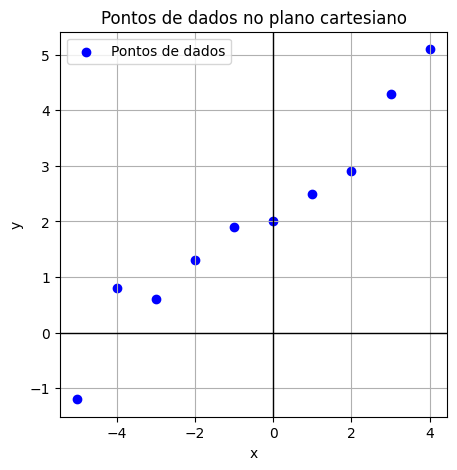

In [28]:
import matplotlib.pyplot as plt

def demonstracao_cartesiana(x, y, title, **label):
    plt.figure(figsize=(5,5))
    plt.scatter(x,y, color='blue', label= label if label else "Pontos de dados")

    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)

    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()


demonstracao_cartesiana(x, y, "Pontos de dados no plano cartesiano")

Agora, Implementarei as equações demonstradas na teoria do gradiente descendente para atualizar os valores de $\theta_0$ e $\theta_1$ iterativamente, até que a função de custo J seja minimizada.
$$
J(\theta_0, \theta_1)=\sum_{i=1}^{n} (\theta_0 + \theta_1*xi - yi)^2
$$

In [29]:
def custo(x, y, theta0, theta1):
    y_pred = theta0 + theta1 * x
    erro = y_pred - y
    J = np.sum(erro**2)
    return J

### Retorno à teoria do Gradiente Descendente

O gradiente descedente, matematicamente, é uma forma de achar $\theta_0$ e $\theta_1$ que minimizam a função de custo $J(\theta_0, \theta_1)$. O gradiente é, na verdade, uma função derivada que indica a direção de maior crescimento da função de custo, sendo uma parábola convexa e diferenciável. Logo, intuitivamente, para minimizar a função de custo, devemos seguir na direção oposta ao gradiente, procurando o ponto onde a derivada é zero.

Para isso, usarei a técnica iterativa para atualizar os valores:

$$
\theta_n = \theta_v - \alpha \cdot \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_v}
$$

**Onde:**
- $\alpha$ é a distância de cada passo na direção do gradiente (taxa de aprendizado)
- $\theta_v$ representa o valor $\theta$ analisado (pode ser $\theta_0$ ou $\theta_1$)
- $\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_v}$ é a derivada parcial da função de custo em relação a $\theta_v$
- $\theta_n$ é o novo valor que será atribuído ao $\theta$ escolhido

---

Portanto, para calcular as derivadas parciais, temos:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}
$$

<center>e</center>

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1}
$$

---

#### Cálculo das Derivadas Parciais

Ambos passam pelo processo de derivação parcial da função de custo $J$. As derivadas parciais são calculadas como:

$$
\frac{\partial J}{\partial \theta_x} = 2 \sum_{i=1}^{n} (\theta_0 + \theta_1 \cdot x_i - y_i)
$$

E sendo $\theta_0 + \theta_1 \cdot x_i - y_i = erro_i$, podemos então reescrever como:

$$
\frac{\partial J}{\partial \theta_x} = 2 \sum_{i=1}^{n} (erro_i)
$$

O que me permite realizar a diferenciação utilizando a regra da cadeia em $erro_i$:

$$
\frac{\partial J}{\partial \theta_x} = 2 \sum_{i=1}^{n} (erro_i) \cdot \frac{\partial (erro_i)}{\partial \theta_x}
$$

---

#### Aplicando para cada parâmetro

Portanto, agora, aplicando o valor $\theta$ desejado em $\theta_x$, podemos evoluir para 2 resultados distintos, um para $\theta_0$ e outro para $\theta_1$, desse modo:

**Para $\theta_0$:**

$$
\frac{\partial J}{\partial \theta_0} = 1
$$

Aplicando esse resultado na equação de atualização de $\theta_0$, temos:

$$
\theta_0 := \theta_0 - 2\alpha \sum_{i=1}^{n} (\theta_0 + \theta_1 \cdot x_i - y_i)
$$

**Para $\theta_1$:**

$$
\frac{\partial J}{\partial \theta_1} = x_i
$$

Aplicando esse resultado na equação de atualização de $\theta_1$, temos:

$$
\theta_1 := \theta_1 - 2\alpha \sum_{i=1}^{n} (\theta_0 + \theta_1 \cdot x_i - y_i) \cdot x_i
$$


### Aplicação

Desse modo podemos implementar o gradiente descendente em código, atualizando os valores de $\theta_0$ e $\theta_1$ iterativamente até que a função de custo $J(\theta_0, \theta_1)$ seja minimizada. Economizando processamento e tempo, implementarei as derivações já aplicadas nas equações de atualização dos valores de $\theta_0$ e $\theta_1$ com um valor $\alpha = 0.01$.Contudo, podemos afirmar que a representação grafica não é bi-dimencional, devio a existencia de 2 variaveis independentes, $\theta_0$ e $\theta_1$. Poranto vou usar uma equação simplificada igualando $\theta_0 = 0$, assim a equação fica:
$$
J(\theta_1)=\sum_{i=1}^{n} (\theta_1 \cdot xi - yi)^2
$$
Sendo assim, uma parabola com a concavidade virada para cima.

In [ ]:
theta_0 = 0.0
theta_1 = 0.0
alpha = 0.01


def j_theta1(theta1, x, y):
    return np.sum(((theta1 * x) - y)**2)

def dJ_dTheta1(theta1, x, y):
    return 2 * np.sum(((theta1 * x) - y) * x)

def gradiente_descendente_1param(x,y,param, alpha ,iteracoes):
    p = param
    hist_p = []
    hist_j = []

    for i in range(iteracoes):
        g = dJ_dTheta1(p, x, y)
        p = p - alpha * g
        
        hist_p.append(p)
        hist_j.append(j_theta1(p, x, y))
    
    return p, hist_p, hist_j

theta_1_final, theta_1_hist, custo_hist = gradiente_descendente_1param(x,y,theta_1, alpha, 1000)

### Plotagem dos Resultados

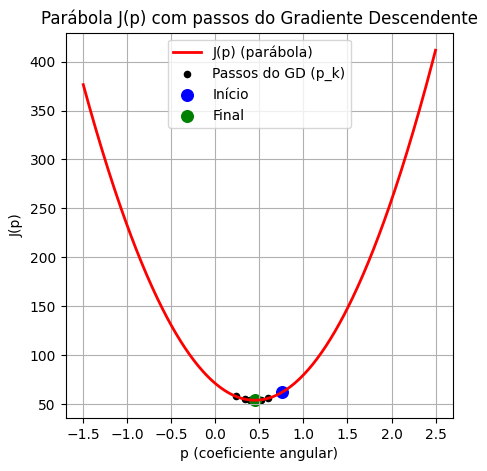

In [31]:
theta_min = min(np.min(theta_1_final), -1) - 0.5
theta_max = max(np.max(theta_1_final), 2) + 0.5

theta_vals = np.linspace(theta_min, theta_max, 400)
J_vals = [j_theta1(tv, x, y) for tv in theta_vals]

plt.figure(figsize=(5,5))
plt.plot(theta_vals, J_vals, '-r', linewidth=2, label='J(p) (parábola)')
plt.scatter(theta_1_hist, custo_hist, color='k', s=20, label='Passos do GD (p_k)')
plt.scatter(theta_1_hist[0], custo_hist[0], color='blue', s=70, label='Início')
plt.scatter(theta_1_hist[-1], custo_hist[-1], color='green', s=70, label='Final')
plt.xlabel('p (coeficiente angular)')
plt.ylabel('J(p)')
plt.title('Parábola J(p) com passos do Gradiente Descendente')
plt.legend(); plt.grid(True)
plt.show()

# B) Regressão linear analítica

Até aqui usei o Gradiente Descendente para encontrar os valores de $\theta_0$ e $\theta_1$, um método iterativo. Essa abordagem é comum em machine learning, pois é eficiente para grandes conjuntos de dados e modelos complexos. No entanto, a regressão linear simples é um caso especial.

A função custo $J(\theta_0, \theta_1)$ é uma equação quadrática sempre convexa, o que significa que existe um ponto global mínimo que pode ser encontrado analiticamente, sem a necessidade de métodos iterativos. Basta derivar a função custo em relação aos parâmetros e igualar a zero.

Partimos então da forma completa da função de custo:

$$
J(\theta_0,\theta_1)=\sum_{i=1}^n (\theta_0 + \theta_1 x_i - y_i)^2,
$$

e usamos a condição de mínimo:

$$
\frac{\partial J}{\partial \theta_0} = 0,
\qquad
\frac{\partial J}{\partial \theta_1} = 0.
$$

Isso gera o seguinte sistema (as Equações Normais):

$$
\frac{\partial J}{\partial \theta_x} =
\begin{cases}
\frac{\partial J}{\partial \theta_0} = 2 \sum (\theta_0 + \theta_1 x_i - y_i) = 0 \\[6pt]
\frac{\partial J}{\partial \theta_1} = 2 \sum x_i(\theta_0 + \theta_1 x_i - y_i) = 0
\end{cases}
$$

Esse sistema linear pode ser resolvido para obter os valores ótimos de $\theta_0$ e $\theta_1$. A solução analítica para o coeficiente angular é:

$$
\theta_1 =
\frac{n \sum x_i y_i - (\sum x_i)(\sum y_i)}
     {n \sum x_i^2 - (\sum x_i)^2}.
$$

E o coeficiente linear é dado por:

$$
\theta_0 = \bar{y} - \theta_1 \bar{x}.
$$


In [ ]:
def regrecao_linear_analitica(x, y):
    n = len(x)
    m_x = np.mean(x)
    m_y = np.mean(y)

    numerador = np.sum((x - m_x) * (y - m_y))
    denominador = np.sum((x - m_x)**2)

    theta1 = numerador / denominador
    theta0 = m_y - theta1 * m_x

    return theta0, theta1